<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/AprendizadoMaquina/T%C3%B3pico%2002%20-%20Aprendizado%20Supervisionado/Preprocessamento-Normalizacao%26Reducao/T%C3%B3pico_02_Aprendizado_Supervisionado_Normalizacao%26Reducao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial Normalização, Redução, e Visualização dos dados

No contexto de machine learning, a normalização, redução e visualização dos dados são estratégias fundamentais para preparar os dados antes de alimentá-los em um modelo de aprendizado de máquina. Este tutorial irá explorar essas técnicas em detalhes, discutindo sua importância no processo de preparação dos dados para o treinamento do modelo de aprendizado de máquina. Para isso, vamos utilizar algumas das bibliotecas Python mais populares, incluindo Pandas, Scikit-Learn e Matplotlib.

#Normalização

 A normalização é um processo que envolve a transformação dos dados para um intervalo específico, a fim de tornar as características comparáveis ​​e evitar que algumas tenham um peso maior do que outras. Isso é particularmente importante quando as características possuem escalas diferentes ou quando a distribuição dos dados é assimétrica. Existem várias técnicas de normalização, como a escala min-max, a escala z-score (StandardScaler()). Cada uma delas tem suas vantagens e desvantagens, dependendo das características dos dados e das necessidades do modelo.

In [1]:
from sklearn import preprocessing
import numpy as np

#feat1 = [1,50]
feat1 = np.random.randint(1,50, size=10)
print(feat1)

#feat1 = [25.,175.] 
feat2 = 25 + np.random.random_sample(10) * 150
print(feat2)

feat3 = np.random.random_sample(10) 
print(feat3)

#feat4 = [-300,300]
feat4 = np.random.randint(-300,300, size=10)
print(feat4)

#feat5 = [-50.,50.]
feat5 = -50 + np.random.random_sample(10) * 100
print(feat5)

features = np.vstack((feat1,feat2,feat3,feat4,feat5))

[48 32 45 36 16  7  3 24 41 31]
[ 32.34011452  57.68472531 154.68912241 167.63862258 150.84619825
 174.7068471   75.66686766 167.20775223  68.53318981  65.66604958]
[0.73936913 0.79293512 0.17291777 0.67372335 0.88900958 0.2423377
 0.15905701 0.80719636 0.47032479 0.45763394]
[  11   37 -284  -56   11 -189  -19 -222 -241 -144]
[ 29.17622789  34.88752776  42.8049144   20.40312549  44.29886455
  35.77483774   8.83562619  23.22896789 -16.86480304  31.85738727]


In [2]:
#np.set_printoptions(suppress=True,precision=4)
for feat in [feat1,feat2,feat3,feat4,feat5]:
  feat_norm = preprocessing.normalize([feat],norm='max')
  print('  Original:', feat)
  print('Normalized:', feat_norm)
  print('----------------------')



  Original: [48 32 45 36 16  7  3 24 41 31]
Normalized: [[1.         0.66666667 0.9375     0.75       0.33333333 0.14583333
  0.0625     0.5        0.85416667 0.64583333]]
----------------------
  Original: [ 32.34011452  57.68472531 154.68912241 167.63862258 150.84619825
 174.7068471   75.66686766 167.20775223  68.53318981  65.66604958]
Normalized: [[0.18511074 0.33018011 0.88542106 0.95954237 0.86342465 1.
  0.43310763 0.95707612 0.39227535 0.3758642 ]]
----------------------
  Original: [0.73936913 0.79293512 0.17291777 0.67372335 0.88900958 0.2423377
 0.15905701 0.80719636 0.47032479 0.45763394]
Normalized: [[0.83167735 0.89193091 0.19450608 0.75783587 1.         0.2725929
  0.17891484 0.90797262 0.52904356 0.51476829]]
----------------------
  Original: [  11   37 -284  -56   11 -189  -19 -222 -241 -144]
Normalized: [[ 0.03873239  0.13028169 -1.         -0.1971831   0.03873239 -0.66549296
  -0.06690141 -0.78169014 -0.84859155 -0.50704225]]
----------------------
  Original: [ 29.1

In [3]:
! pip install -q kaggle
from google.colab import files
#Aqui fazemos upload do Token Kaggle
files.upload()
!mkdir ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!cp kaggle.json ~/.kaggle/
!kaggle datasets download 'ahsan81/hotel-reservations-classification-dataset'
!unzip hotel-reservations-classification-dataset.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
hotel-reservations-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  hotel-reservations-classification-dataset.zip
replace Hotel Reservations.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Hotel Reservations.csv  


In [4]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
hotel_df = pd.read_csv('Hotel Reservations.csv')
hotel_df.head()

#Aqui removemos o BookingID por não julgar necessário com feature. O booking_status por sua vez é label
X = hotel_df.drop(['Booking_ID','booking_status'], axis=1).values
y = hotel_df['booking_status'].values
print(X.shape)
print(y.shape)

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

#Transforma as colunas 4,6,11 (categoricas) para one-hot
columns_to_encode = [4, 6, 11]

encoder = OneHotEncoder(sparse=False, categories='auto')
encoded_columns = encoder.fit_transform(X[:, columns_to_encode])


X = np.delete(X, columns_to_encode, axis=1)
X = np.concatenate((X, encoded_columns), axis=1)

y = LabelEncoder().fit_transform(y)

print(X.shape)
print(y.shape)

Hotel_X, Hotel_y = X,y
print(X[1])
print(y[1])

sampler = RandomUnderSampler(random_state=0)
X_bal, y_bal = sampler.fit_resample(X, y)

Hotel_X_balanced, Hotel_y_balanced = X_bal,y_bal

(36275, 17)
(36275,)
(36275, 30)
(36275,)
[2 0 2 3 0 5 2018 11 6 0 0 0 106.68 1 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
1


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pandas as pd

#X = Hotel_X
#y = Hotel_y
#X = Hotel_X_balanced
#y = Hotel_y_balanced

data = datasets.load_wine()
#data = datasets.load_breast_cancer()
X = data.data
y = data.target

X = Hotel_X
y = Hotel_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalizando os dados
#MinMax
scaler = MinMaxScaler()
#scaler = StandardScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

print("   Original: ", X_train[1])
print("Normalizado: ", X_train_norm[1])

knn = KNN()
nb = GaussianNB()
dt = DecisionTreeClassifier()

for model,model_name in zip([knn,nb,dt],['KNN','Naive Bayes','Decision Tree']):
  
  model.fit(X_train, y_train)
  preds = model.predict(X_test)  
  print(model_name,' - Sem Normalização - ACC: ', accuracy_score(y_test,preds))
  print(classification_report(y_test,preds))
  
  
  model.fit(X_train_norm, y_train)
  preds_norm = model.predict(X_test_norm)  
  print(model_name,' - Com Normalização - ACC: ', accuracy_score(y_test,preds_norm))
  print(classification_report(y_test,preds_norm))
  print("######################################")

   Original:  [ 12.22   1.29   1.94  19.    92.     2.36   2.04   0.39   2.08   2.7
   0.86   3.02 312.  ]
Normalizado:  [0.31989247 0.08403361 0.31182796 0.43298969 0.23913043 0.45323741
 0.48012232 0.48076923 0.52531646 0.1356256  0.27350427 0.64102564
 0.        ]
KNN  - Sem Normalização - ACC:  0.7222222222222222
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.77      0.77      0.77        22
           2       0.50      0.46      0.48        13

    accuracy                           0.72        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.72      0.72      0.72        54

KNN  - Com Normalização - ACC:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00   

Porque Naive Bayes e Decision Tree sofrem menos impactos de dados não normalizados ?

#Redução de Caractéristicas 

A redução de dados é outra técnica importante que consiste na seleção das características mais relevantes para o modelo, reduzindo a complexidade e melhorando a eficiência do treinamento. Existem diversas técnicas de seleção de características, como a análise de correlação, a análise de componentes principais (PCA), a análise discriminante linear (LDA) e a seleção baseada em modelos. Cada uma dessas técnicas tem suas vantagens e desvantagens, dependendo do tipo de problema e das características dos dados.



## PCA (Principal Component Analisys)

A análise de componentes principais (PCA) é uma técnica de redução de dimensionalidade muito utilizada em problemas de aprendizado de máquina. A PCA é uma técnica estatística que permite a redução de dados multidimensionais, mantendo a maior parte da variância dos dados. Essa técnica consiste na transformação dos dados originais em um novo conjunto de dados, composto por componentes principais, que são combinações lineares das características originais. Os componentes principais são ordenados de acordo com a quantidade de variância que cada um explica nos dados. Dessa forma, os primeiros componentes principais capturam a maior parte da variância dos dados, enquanto os últimos explicam uma quantidade muito pequena. A técnica de PCA é útil para problemas com um grande número de características, pois permite reduzir a dimensão dos dados, eliminando as características menos relevantes e tornando o modelo mais eficiente e menos propenso ao overfitting. 

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


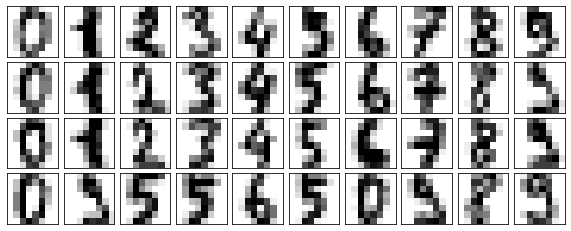

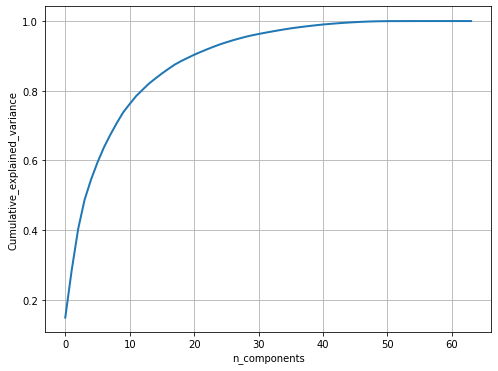

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#X = Hotel_X
#y = Hotel_y
#X = Hotel_X_balanced
#y = Hotel_y_balanced

#data = datasets.load_wine()
#data = datasets.load_breast_cancer()

#A base de digitos possuem 64 features
data = datasets.load_digits()
X = data.data
y = data.target

#vamos plotar os digitos
plot_digits(X)
print(X[1])
n_features = X.shape[1]
pca = PCA(n_components=n_features)
reduced_data = pca.fit_transform(X)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)
                              
plt.figure(figsize=(8, 6))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


Abaixo interpretamos a matriz de covariancia e correlação dos dados, para medir a relação das variáveis:

##Covariância

Mede a direção e o grau da relação linear entre duas variáveis;
É uma medida bruta, que pode ser difícil de interpretar em valores absolutos;
Valores positivos indicam que as duas variáveis estão positivamente relacionadas, enquanto valores negativos indicam que estão negativamente relacionadas;
Valores próximos a zero indicam que as duas variáveis não estão relacionadas linearmente.


In [7]:
from sklearn.covariance import empirical_covariance

# Calcule a matriz de covariância
cov_matrix = empirical_covariance(X)

# Imprima a matriz de covariância
print(cov_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.82253951  2.39965886 ... -0.15980632  0.09845941
  -0.0740206 ]
 [ 0.          2.39965886 22.59579234 ... -1.15479735  1.41124994
   0.72947431]
 ...
 [ 0.         -0.15980632 -1.15479735 ... 34.79797313 15.63983626
   2.87398245]
 [ 0.          0.09845941  1.41124994 ... 15.63983626 16.72327062
   4.71815884]
 [ 0.         -0.0740206   0.72947431 ...  2.87398245  4.71815884
   3.45812736]]


##Correlação

Mede a força e a direção da relação linear entre duas variáveis;
É uma medida padronizada, que varia entre -1 e 1, facilitando a interpretação;

Valores próximos a 1 indicam uma relação linear positiva forte, enquanto valores próximos a -1 indicam uma relação linear negativa forte;

Valores próximos a zero indicam que as duas variáveis não estão relacionadas linearmente.

In [8]:
corr_matrix = cov_matrix / np.outer(np.sqrt(np.diag(cov_matrix)), np.sqrt(np.diag(cov_matrix)))
print(corr_matrix)

[[        nan         nan         nan ...         nan         nan
          nan]
 [        nan  1.          0.55661811 ... -0.02987023  0.02654717
  -0.0438888 ]
 [        nan  0.55661811  1.         ... -0.04118272  0.07259882
   0.08252314]
 ...
 [        nan -0.02987023 -0.04118272 ...  1.          0.64832776
   0.26199116]
 [        nan  0.02654717  0.07259882 ...  0.64832776  1.
   0.6204281 ]
 [        nan -0.0438888   0.08252314 ...  0.26199116  0.6204281
   1.        ]]


<ipython-input-8-cf9a0259136f>:1: RuntimeWarning: invalid value encountered in true_divide
  corr_matrix = cov_matrix / np.outer(np.sqrt(np.diag(cov_matrix)), np.sqrt(np.diag(cov_matrix)))


In [9]:
for n_comp in range(2,n_features,4):
  pca = PCA(n_components=n_comp)
  reduced_data = pca.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(reduced_data, y, test_size=0.3, random_state=0)

  clf = DecisionTreeClassifier(random_state=0)
  clf.fit(X_train, y_train)
  preds = clf.predict(X_test)  
  print(f'n_comp: {n_comp}, acc: {accuracy_score(y_test,preds)}')
  #print(classification_report(y_test,preds))


n_comp: 2, acc: 0.5574074074074075
n_comp: 6, acc: 0.8333333333333334
n_comp: 10, acc: 0.8185185185185185
n_comp: 14, acc: 0.8277777777777777
n_comp: 18, acc: 0.8351851851851851
n_comp: 22, acc: 0.8388888888888889
n_comp: 26, acc: 0.8314814814814815
n_comp: 30, acc: 0.8388888888888889
n_comp: 34, acc: 0.8148148148148148
n_comp: 38, acc: 0.8222222222222222
n_comp: 42, acc: 0.8203703703703704
n_comp: 46, acc: 0.8277777777777777
n_comp: 50, acc: 0.8111111111111111
n_comp: 54, acc: 0.8240740740740741
n_comp: 58, acc: 0.8203703703703704
n_comp: 62, acc: 0.8388888888888889


#Visualização dos Dados

A visualização dos dados é uma técnica poderosa para entender a relação entre as características e identificar padrões nos dados. As técnicas de visualização mais comuns incluem histogramas, diagramas de dispersão, box plots e mapas de calor. A escolha da técnica de visualização depende das características dos dados e dos objetivos do problema. Além disso, as técnicas de visualização podem ser combinadas com técnicas de redução de dados para visualizar as características mais relevantes.

Abaixo, vamos analisar a dispersão das amostras, reduzindo para 3 componentes.

## PCA para Visualização

In [10]:
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
from sklearn.decomposition import PCA


# carregando o conjunto de dados iris
data = datasets.load_digits()
X = data.data
y = data.target

# Redução de dimensionalidade usando PCA para 3 dimensões
pca = PCA(n_components=3)
pca_components = pca.fit_transform(X)

# Plotando a visualização PCA em 3D
fig = px.scatter_3d(x=pca_components[:, 0], y=pca_components[:, 1], z=pca_components[:, 2], color=y)
fig.show()

#TSNE

O t-SNE é um algoritmo de aprendizado de máquina não linear que mapeia pontos de um espaço de alta dimensão em um espaço de baixa dimensão (geralmente 2D ou 3D) enquanto preserva as relações de proximidade entre esses pontos.

O algoritmo funciona de forma iterativa e pode ser dividido em duas etapas principais: a construção de uma distribuição de probabilidade de pares de pontos de dados em alta dimensão e a construção de uma distribuição de probabilidade de pares de pontos de dados em baixa dimensão.



In [11]:
from sklearn.manifold import TSNE

# Redução de dimensionalidade usando t-SNE para 3 dimensões
tsne = TSNE(n_components=3, random_state=42)
tsne_components = tsne.fit_transform(X)

# Plotando a visualização t-SNE em 3D
fig = px.scatter_3d(x=tsne_components[:, 0], y=tsne_components[:, 1], z=tsne_components[:, 2], color=y)
fig.show()

#Considerações Finais

##Normalização:
###Vantagens
* Ajuda a garantir que as variáveis de entrada tenham a mesma escala e * unidade de medida
* Evita que valores extremos em uma variável dominem os valores de outras variáveis
* Pode melhorar a precisão dos modelos de aprendizado de máquina

###Desvantagens
* Pode levar a uma perda de informação
* Pode afetar a distribuição dos dados

##Redução de dimensionalidade:
###Vantagens
* Ajuda a lidar com problemas de alta dimensionalidade
* Identifica as variáveis mais importantes para a previsão
* Reduz a complexidade dos dados

###Desvantagens
* Pode levar a uma perda de informação
* Pode afetar a interpretabilidade dos dados



#Material Extra (OFF-TOPIC)

* Avaliação por quartil

Precisao Holdout Dataset: 0.845
(200, 10)
(200, 10)
(200, 10)
(199, 10)
Precisão no quartil 1: 0.96
Precisão no quartil 2: 0.88
Precisão no quartil 3: 0.68
Precisão no quartil 4: 0.92


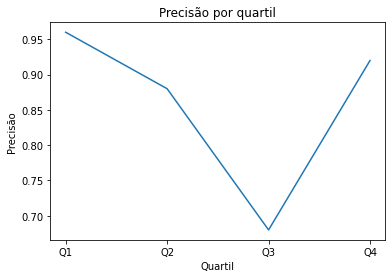

In [12]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Gerando dados aleatórios
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
print(f'Precisao Holdout Dataset: {clf.score(X_test, y_test)}')
# Dividindo os dados em quartis
quartis = np.percentile(X[:, 0], [0, 25, 50, 75, 100])
clf = GaussianNB()

# Criando listas para armazenar as precisões em cada quartil
precisoes_quartis = []
for i in range(4):
    X_quartil = X[(X[:, 0] >= quartis[i]) & (X[:, 0] < quartis[i+1])]
    y_quartil = y[(X[:, 0] >= quartis[i]) & (X[:, 0] < quartis[i+1])]
    X_train, X_test, y_train, y_test = train_test_split(X_quartil, y_quartil, test_size=0.2, random_state=42)
    clf = GaussianNB()
    print(X_train.shape)
    clf.fit(X_train, y_train)
    precisao = clf.score(X_test, y_test)
    precisoes_quartis.append(precisao)

# Imprimindo as precisões por quartil
for i, precisao in enumerate(precisoes_quartis):
    print(f'Precisão no quartil {i+1}: {precisao:.2f}')

# Criando o gráfico de caixa
plt.plot(precisoes_quartis)
plt.xticks(np.arange(0, 4), ['Q1', 'Q2', 'Q3', 'Q4'])
plt.xlabel('Quartil')
plt.ylabel('Precisão')
plt.title('Precisão por quartil')
plt.show()

## PCA para Compressão de Dados



## Compressão Dados (Raw Data)

Dados Originais:
[[ 14   3  18 -14 -12]
 [ -4  -9   2  -5 -11]
 [ 17 -14   2 -13 -16]
 [ 19 -14  11   5  13]
 [  0 -14  13 -18   9]]
Dados descomprimidos:
[[ 15.63375084   0.41934083  17.28527962 -16.95613489 -11.71181557]
 [ -1.20003471 -13.42280178   0.77509336 -10.06630197 -10.50610192]
 [ 13.72247827  -8.82285406   3.43382425  -7.06959978 -16.57813634]
 [ 19.92628433 -15.46315099  10.59477647   3.32396632  13.16339133]
 [ -2.08247874 -10.71053399  13.9110263  -14.23192968   8.6326625 ]]


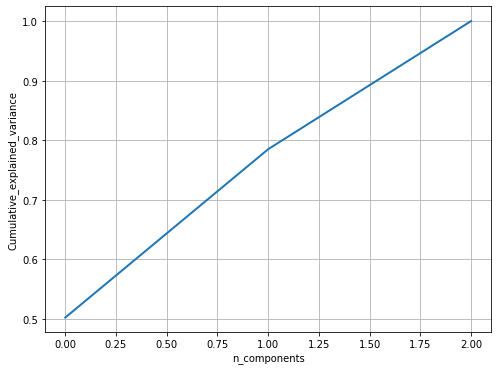

In [13]:
import numpy as np
from sklearn.decomposition import PCA


# Criando um conjunto de dados de exemplo
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
X = np.random.randint(-20,20, size=(5,5))
# Instanciando o modelo PCA
pca = PCA(n_components=3)

# Treinando o modelo com os dados de exemplo
pca.fit(X)

# Aplicando a compressão nos dados de exemplo
X_compressed = pca.transform(X)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

# Aplicando a descompressão nos dados comprimidos
X_recovered = pca.inverse_transform(X_compressed)

print("Dados Originais:")
print(X)

# Imprimindo os dados comprimidos
#print("Dados comprimidos:")
#print(X_compressed)

# Imprimindo os dados descomprimidos
print("Dados descomprimidos:")
print(X_recovered)

plt.figure(figsize=(8, 6))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

##Imagem (Matrix de Dados)

AttributeError: ignored

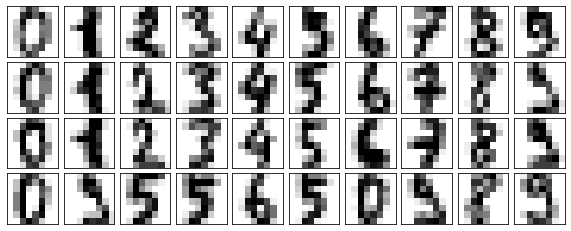

In [14]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

digits = datasets.load_digits()
X = data.data
y = data.target
plot_digits(X)
n_features = X.shape[1]
pca = PCA(n_components=n_features)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)
                              
plt.figure(figsize=(8, 6))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [ ]:
pca = PCA(n_components=2)
compressed_digits = pca.fit_transform(X)
reconstructed = pca.inverse_transform(compressed_digits)
plot_digits(reconstructed)


In [ ]:
diff = X[1]-reconstructed[1]
print(diff)
print(diff.shape)
plt.imshow(diff.reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plt.show()